**Задание**

**Цель:** применить на практике базовые ансамблевые методы

**Описание задания:**

Решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Подготовьте датасет к обучению моделей.

  a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

  b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
  
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

  a) tree.DecisionTreeClassifier

  b) ensemble.RandomForestClassifier
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

  a) Повторите п. 5
8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

  a) Повторите п. 5
9. Сформулируйте выводы по проделанной работе.

  a) Сравните метрики построенных моделей.

  b) Напишите свое мнение, какая модель наилучшая и почему.


Результат: получены знания по использованию базовых ансамблевых методов.

**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


В датасете собраны признаки, описываемые переменными разных типов; пропусков нет.

In [ ]:
data[:3]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [ ]:
data.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


**2. Подготовьте датасет к обучению моделей.**

  **a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.**

Количество уникальных начений категориальных переменных - от 2 до 4 (небольшое), для их перевода в числа воспользуемся get_dummies.

In [ ]:
df_heart = pd.get_dummies(data)
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

In [ ]:
# Датасет с признаками и серия с целевой переменной:
X = df_heart.drop(columns='HeartDisease')
y = df_heart.HeartDisease

  **b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).**

In [ ]:
import seaborn as sns

Проверим предположение, что болезнями сердца чаще страдают мужчины, и посмотрим, как тип боли в области грудной клетки соотносится с наличием заболевания сердца.

<Axes: xlabel='ChestPainType', ylabel='HeartDisease'>

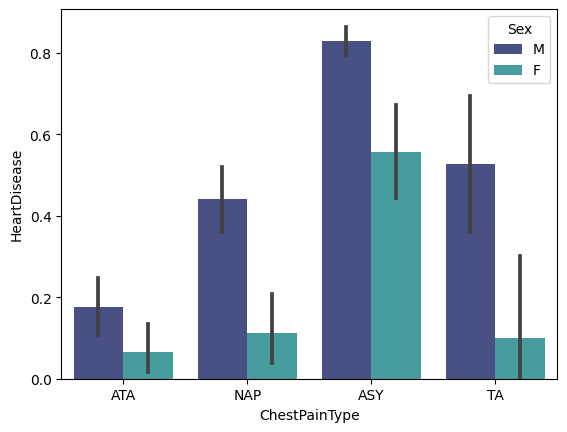

In [ ]:
sns.barplot(data, y='HeartDisease', x='ChestPainType', hue='Sex', palette='mako')

Болезнями сердца дейстительно чаще страдают мужчины, при этом болезнь протекает чаще всего либо бессимптомно (ASY: Asymptomatic), либо сопровождается типичной стенокардией (TA: Typical Angina). Атипичная стенокардия (ATA: Atypical Angina) реже других типов боли является симптомом заболевания сердца.

Посмотрим, действительно ли у людей с заболеваниями сердца более высокиай холестерин в крови. Также проверим предположение, что у мужчин (т.к. они чаще имеют болезни сердца), холестерин выше, чем у женщин.  

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

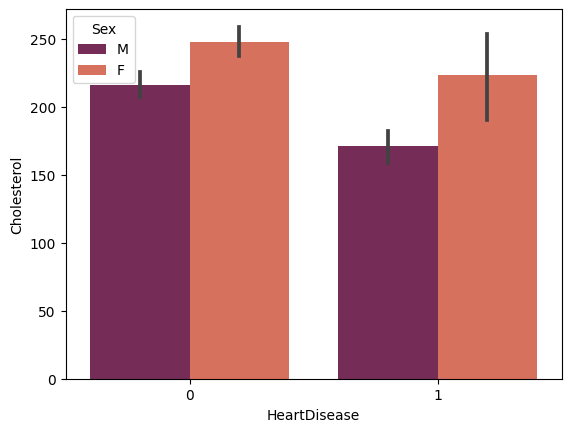

In [ ]:
sns.barplot(data, x='HeartDisease', y='Cholesterol', hue='Sex', palette='rocket', saturation=0.7)

Данные не подтвердили оба предположения: у "сердечников" холестерин немного ниже, чем у людей без болезней сердца. Женщины обеих групп (с и без болезней сердца) имеют более высокие значения холестерина в крови, чем мужчины.

**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

**4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:**

  **a) tree.DecisionTreeClassifier**

  **b) ensemble.RandomForestClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_tree = DecisionTreeClassifier(random_state=9)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=9)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rforest = RandomForestClassifier(random_state=9)
model_rforest.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

**5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Предсказания модели "Дерево решений":
model_tree.predict(X_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
# Метрики для дерева решений:
print(classification_report(y_test, model_tree.predict(X_test), target_names=['Normal', 'Heart_disease']))

               precision    recall  f1-score   support

       Normal       0.78      0.76      0.77        90
Heart_disease       0.77      0.80      0.79        94

     accuracy                           0.78       184
    macro avg       0.78      0.78      0.78       184
 weighted avg       0.78      0.78      0.78       184



In [ ]:
# Предсказание модели "Случайный лес":
model_rforest.predict(X_test)

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
# Метрики для случайного леса:
print(classification_report(y_test, model_rforest.predict(X_test), target_names=['Normal', 'Heart_disease']))

               precision    recall  f1-score   support

       Normal       0.93      0.82      0.87        90
Heart_disease       0.85      0.94      0.89        94

     accuracy                           0.88       184
    macro avg       0.89      0.88      0.88       184
 weighted avg       0.88      0.88      0.88       184



**6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.**

In [ ]:
# Для модели "Дерево решений"
imp_features_t = pd.Series(model_tree.feature_importances_)
imp_features_t.index = pd.Series(X_train.columns)
imp_features_t.sort_values(ascending=False, inplace=True)
imp_features_t

ST_Slope_Up          0.390646
MaxHR                0.148101
ChestPainType_ASY    0.083485
RestingBP            0.078617
Oldpeak              0.074094
Age                  0.070790
Cholesterol          0.069870
Sex_M                0.017065
Sex_F                0.014116
RestingECG_ST        0.011431
ChestPainType_TA     0.009707
RestingECG_LVH       0.009671
RestingECG_Normal    0.009234
FastingBS            0.008095
ChestPainType_ATA    0.005079
ExerciseAngina_N     0.000000
ExerciseAngina_Y     0.000000
ST_Slope_Down        0.000000
ST_Slope_Flat        0.000000
ChestPainType_NAP    0.000000
dtype: float64

In [ ]:
# Для модели "Случайный лес"
imp_features_f = pd.Series(model_rforest.feature_importances_)
imp_features_f.index=pd.Series(X_train.columns)
imp_features_f.sort_values(ascending=False, inplace=True)
imp_features_f

ST_Slope_Up          0.149158
ST_Slope_Flat        0.104727
Cholesterol          0.093707
MaxHR                0.093050
ChestPainType_ASY    0.084980
Oldpeak              0.077231
RestingBP            0.073483
Age                  0.071785
ExerciseAngina_Y     0.055903
ExerciseAngina_N     0.041143
ChestPainType_ATA    0.026189
FastingBS            0.021412
Sex_F                0.020586
Sex_M                0.019863
RestingECG_LVH       0.016853
ChestPainType_NAP    0.012668
RestingECG_Normal    0.012587
ST_Slope_Down        0.009421
RestingECG_ST        0.008775
ChestPainType_TA     0.006476
dtype: float64

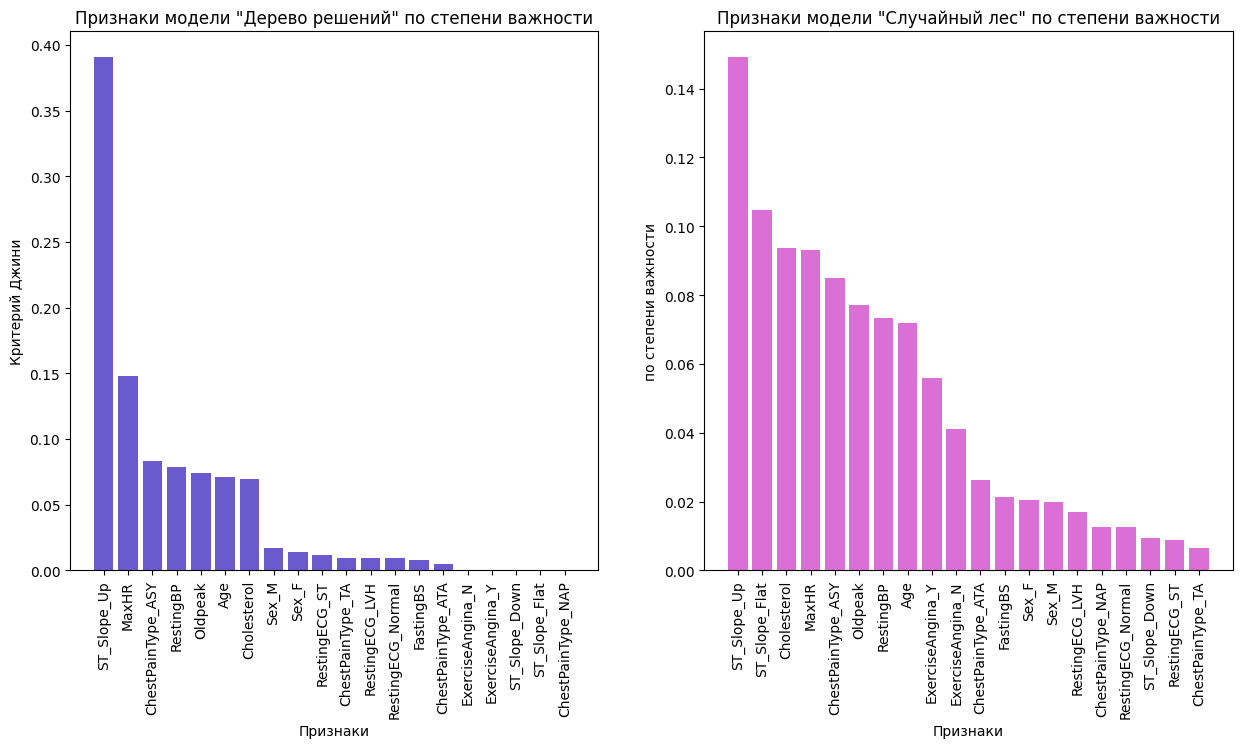

In [ ]:
# Построение столбчатой диаграммы признаков
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.title('Признаки модели "Дерево решений" по степени важности')
plt.xlabel('Признаки')
plt.ylabel('Критерий Джини')
plt.xticks(rotation=90)
plt.bar(imp_features_t.index, imp_features_t, color='slateblue')

plt.subplot(122)
plt.title('Признаки модели "Случайный лес" по степени важности')
plt.xlabel('Признаки')
plt.ylabel('по степени важности')
plt.xticks(rotation=90)
plt.bar(imp_features_f.index, imp_features_f, color='orchid')
plt.show()

**7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, max_samples=1, max_features=1, random_state=9)

In [ ]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=1,
                  max_samples=1, random_state=9)

  **a) Повторите п. 5**

In [ ]:
y_pred_bag = bagging.predict(X_test)
y_pred_bag

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred_bag, target_names=['Normal', 'Heart_disease'], zero_division=0))

               precision    recall  f1-score   support

       Normal       0.49      1.00      0.66        90
Heart_disease       0.00      0.00      0.00        94

     accuracy                           0.49       184
    macro avg       0.24      0.50      0.33       184
 weighted avg       0.24      0.49      0.32       184



**8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

In [ ]:
stack_cl = StackingClassifier(estimators=[('Decision_Tree', model_tree), ('Random_forest', model_rforest)], final_estimator=LinearSVC())

In [ ]:
stack_cl.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision_Tree',
                                DecisionTreeClassifier(random_state=9)),
                               ('Random_forest',
                                RandomForestClassifier(random_state=9))],
                   final_estimator=LinearSVC())

  **a) Повторите п. 5**

In [ ]:
stack_cl.predict(X_test)

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
print(classification_report(y_test, stack_cl.predict(X_test), target_names=['Normal', 'Heart_disease']))

               precision    recall  f1-score   support

       Normal       0.92      0.81      0.86        90
Heart_disease       0.84      0.94      0.88        94

     accuracy                           0.88       184
    macro avg       0.88      0.87      0.87       184
 weighted avg       0.88      0.88      0.87       184



**9. Сформулируйте выводы по проделанной работе.**

  **a) Сравните метрики построенных моделей.**

In [ ]:
print('DECISION TREE', classification_report(y_test, model_tree.predict(X_test), target_names=['Normal', 'Heart_disease']))
print('RANDOM FOREST', classification_report(y_test, model_rforest.predict(X_test), target_names=['Normal', 'Heart_disease']))
print('BAGGING', classification_report(y_test, y_pred_bag, target_names=['Normal', 'Heart_disease'], zero_division=0))
print('STACKING', classification_report(y_test, stack_cl.predict(X_test), target_names=['Normal', 'Heart_disease']))

DECISION TREE                precision    recall  f1-score   support

       Normal       0.78      0.76      0.77        90
Heart_disease       0.77      0.80      0.79        94

     accuracy                           0.78       184
    macro avg       0.78      0.78      0.78       184
 weighted avg       0.78      0.78      0.78       184

RANDOM FOREST                precision    recall  f1-score   support

       Normal       0.93      0.82      0.87        90
Heart_disease       0.85      0.94      0.89        94

     accuracy                           0.88       184
    macro avg       0.89      0.88      0.88       184
 weighted avg       0.88      0.88      0.88       184

BAGGING                precision    recall  f1-score   support

       Normal       0.49      1.00      0.66        90
Heart_disease       0.00      0.00      0.00        94

     accuracy                           0.49       184
    macro avg       0.24      0.50      0.33       184
 weighted avg       0

Метрики для разных моделей заметно разнятся. Худшая модель для данной задачи - Bagging: при хорошей способности выделять 0 класс обладает худшей предсказательной способностью. Дерево решений с настройками по умолчанию и без оптимизации параметров показало средний результат. Самые высокие метрики - Случайный лес и Stacking.

  **b) Напишите свое мнение, какая модель наилучшая и почему.**

Т.к. данная задача - определение наличия заболевания - относится к той категории, когда дополнительная проверка необходима, то для оценки качества модели целесообразно ориентироваться на Recall. По этому параметру лучше всего показали себя модели "Случайный лес" и "Stacking".